https://www.kaggle.com/code/gireeshs/volkswagen-price-regression-r-2-0-9555/input

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
df = pd.read_csv('audi.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [5]:
df.duplicated().sum()

103

In [209]:
df.drop_duplicates(inplace = True, ignore_index = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10565 entries, 0 to 10564
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10565 non-null  object 
 1   year          10565 non-null  int64  
 2   price         10565 non-null  int64  
 3   transmission  10565 non-null  object 
 4   mileage       10565 non-null  int64  
 5   fuelType      10565 non-null  object 
 6   tax           10565 non-null  int64  
 7   mpg           10565 non-null  float64
 8   engineSize    10565 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 743.0+ KB


In [107]:
df.describe()

E:\Anaconda\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,year,price,mileage,tax,mpg,engineSize
count,10565.000000,10565.000000,10565.000000,10565.000000,1.056500e+04,10565.000000
mean,2017.084524,22853.956081,24955.960530,125.909134,inf,1.931641
std,2.167309,11723.076767,23448.942551,67.408761,1.296094e+01,0.602539
min,1997.000000,1490.000000,1.000000,0.000000,1.890625e+01,0.000000
25%,2016.000000,15000.000000,6000.000000,125.000000,4.090625e+01,1.500000
50%,2017.000000,20000.000000,19268.000000,145.000000,4.959375e+01,2.000000
75%,2019.000000,27990.000000,36668.000000,145.000000,5.890625e+01,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,1.882500e+02,6.300781


In [11]:
print(df['mpg'].max())
print(df['engineSize'].max())

188.3
6.3


In [13]:
df['year'] = df['year'].astype('int16')
df['price'] = df['price'].astype('int32')
df['mileage'] = df['mileage'].astype('int32')
df['tax'] = df['tax'].astype('int16')
df['mpg'] = df['mpg'].astype('float16')
df['engineSize'] = df['engineSize'].astype('float16')

In [15]:
print(df['mpg'].max())
print(df['engineSize'].max())

188.2
6.3


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10565 entries, 0 to 10564
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10565 non-null  object 
 1   year          10565 non-null  int16  
 2   price         10565 non-null  int32  
 3   transmission  10565 non-null  object 
 4   mileage       10565 non-null  int32  
 5   fuelType      10565 non-null  object 
 6   tax           10565 non-null  int16  
 7   mpg           10565 non-null  float16
 8   engineSize    10565 non-null  float16
dtypes: float16(2), int16(2), int32(2), object(3)
memory usage: 412.8+ KB


In [19]:
df['transmission'].value_counts()

transmission
Manual       4317
Semi-Auto    3568
Automatic    2680
Name: count, dtype: int64

In [21]:
df['model'].value_counts()

model
A3     1917
Q3     1379
A4     1375
A1     1337
A5      874
Q5      864
Q2      810
A6      748
Q7      394
TT      336
A7      122
A8      118
Q8       69
RS6      39
RS3      33
RS4      31
RS5      28
R8       28
S3       18
SQ5      16
S4       12
SQ7       8
S8        4
S5        3
A2        1
RS7       1
Name: count, dtype: int64

In [23]:
#df['model'].map({'RS7' : 'Others', 'A2' : 'Others'}).value_counts()
df.loc[df['model'] == ' A2', 'model'] = 'Others'
df.loc[df['model'] == ' RS7', 'model'] = 'Others'
df['model'].value_counts()

model
 A3       1917
 Q3       1379
 A4       1375
 A1       1337
 A5        874
 Q5        864
 Q2        810
 A6        748
 Q7        394
 TT        336
 A7        122
 A8        118
 Q8         69
 RS6        39
 RS3        33
 RS4        31
 RS5        28
 R8         28
 S3         18
 SQ5        16
 S4         12
 SQ7         8
 S8          4
 S5          3
Others       2
Name: count, dtype: int64

In [25]:
num_cols = df.select_dtypes(exclude = 'object').columns.to_list()
num_cols

['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']

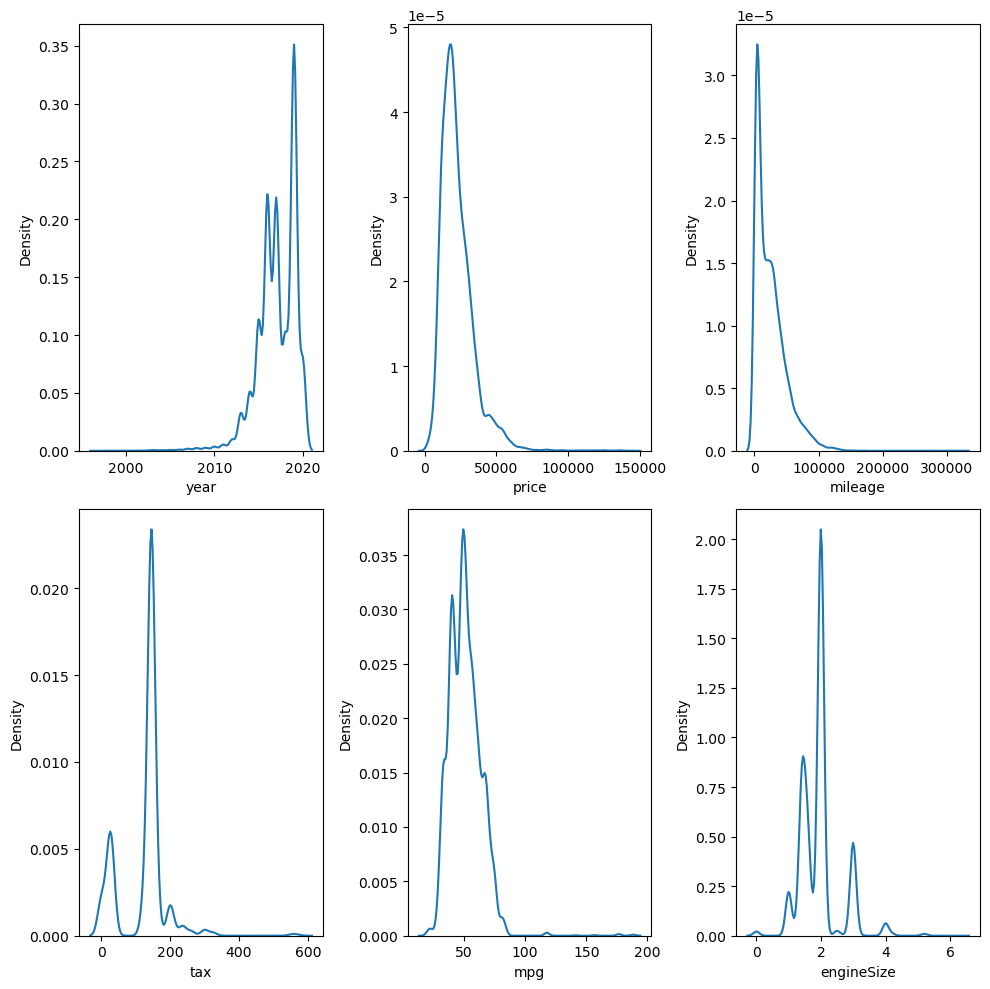

In [27]:
fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 10))
axis = axis.flatten()
for i, col in enumerate(num_cols):
    sns.kdeplot(x = df[col], ax = axis[i])
plt.tight_layout()
plt.show()

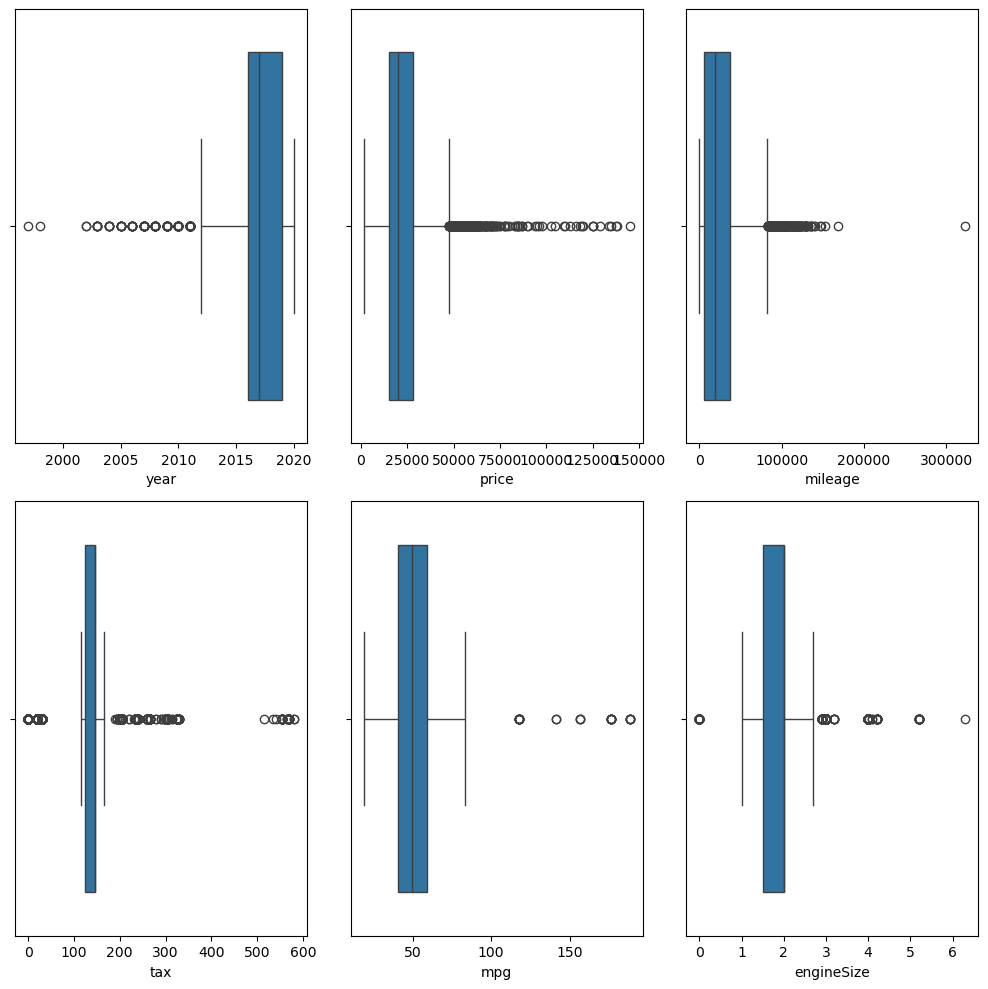

In [29]:
fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 10))
axis = axis.flatten()
for i, col in enumerate(num_cols):
    sns.boxplot(x = df[col], ax = axis[i])
plt.tight_layout()
plt.show()

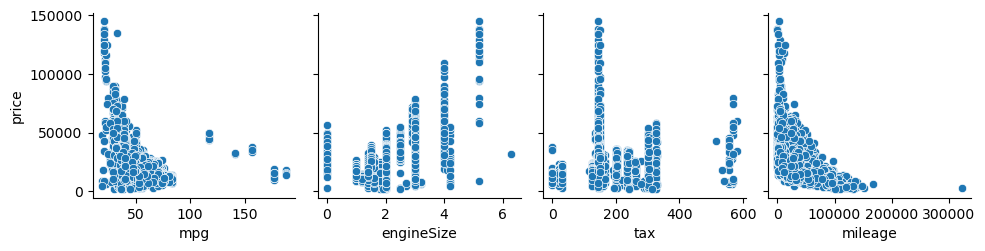

In [31]:
sns.pairplot(data = df, y_vars = 'price', x_vars = ['mpg', 'engineSize', 'tax', 'mileage'])

<Axes: >

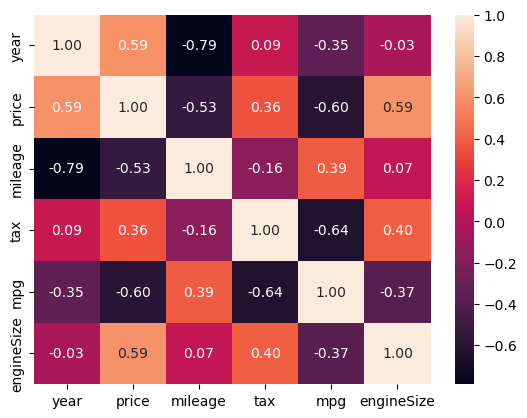

In [33]:
sns.heatmap(df.corr(numeric_only=True), annot = True, fmt = '.2f')

In [35]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, VotingRegressor, StackingRegressor, AdaBoostRegressor, ExtraTreesRegressor, 
HistGradientBoostingRegressor, GradientBoostingRegressor)
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score

In [36]:
X = df.drop(columns = ['price'])
y = df['price']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = df['model'], test_size = 0.2, random_state = 22)

In [41]:
X_train_cpy = X_train.copy()
X_test_cpy = X_test.copy()
mms = MinMaxScaler()
#[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
X_train_cpyt = mms.fit_transform(X_train_cpy.select_dtypes(exclude = 'object'))
X_test_cpyt = mms.transform(X_test_cpy.select_dtypes(exclude = 'object'))

In [43]:
X_train_cpy.select_dtypes(exclude = 'object')

,year,mileage,tax,mpg,engineSize
8404,2019,6785,145,35.81250,3.000000
473,2017,25520,145,50.40625,1.400391
9450,2019,2632,145,38.18750,2.000000
10014,2019,2555,145,44.09375,1.000000
10245,2014,64798,200,47.90625,2.000000
...,...,...,...,...,...
1040,2017,31777,30,65.68750,2.000000
1614,2015,35520,260,41.50000,3.000000
9352,2019,10,145,30.09375,2.500000
1360,2018,15072,145,52.31250,1.400391


In [45]:
df_temp = pd.DataFrame(data = X_train_cpyt, columns = X_train_cpy.select_dtypes(exclude = 'object').columns)

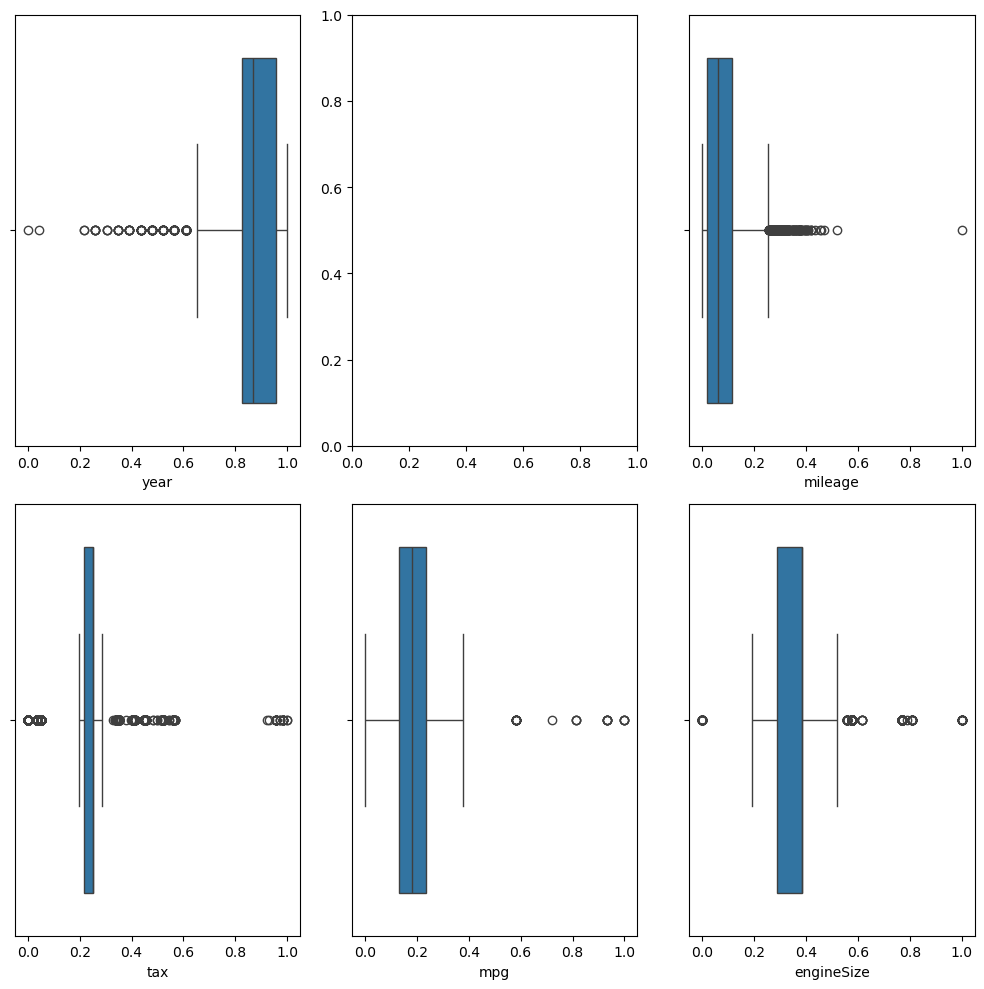

In [47]:
fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 10))
axis = axis.flatten()
for i, col in enumerate(num_cols):
    if col != 'price':
        sns.boxplot(x = df_temp[col], ax = axis[i])
plt.tight_layout()
plt.show()

In [49]:
X_train_cpytp = pd.DataFrame(data = X_train_cpyt, columns = X_train_cpy.select_dtypes(exclude = 'object').columns)
X_train_cpytp
X_test_cpytp = pd.DataFrame(data = X_test_cpyt, columns = X_train_cpy.select_dtypes(exclude = 'object').columns)

In [51]:
pt = PowerTransformer()
X_train_cpytp['engineSize'] = X_train_cpytp['engineSize'] + 0.0001
X_test_cpytp['engineSize'] = X_test_cpytp['engineSize'] + 0.0001
X_train_cpytp[X_train_cpytp.select_dtypes(exclude = 'object').columns.to_list()] = pt.fit_transform(X_train_cpytp.select_dtypes(exclude = 'object'))
X_test_cpytp[X_train_cpytp.select_dtypes(exclude = 'object').columns.to_list()] = pt.transform(X_test_cpytp.select_dtypes(exclude = 'object'))

In [53]:
for col in num_cols:
    if col != 'price':
        print(X_train[col].min())

1997
1
0
18.9
0.0


In [55]:
df['engineSize'].min()

0.0

In [57]:
(df['engineSize'] + 0.00001).min()

1e-05

E:\Anaconda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
E:\Anaconda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
E:\Anaconda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
E:\Anaconda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
E:\Anaconda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


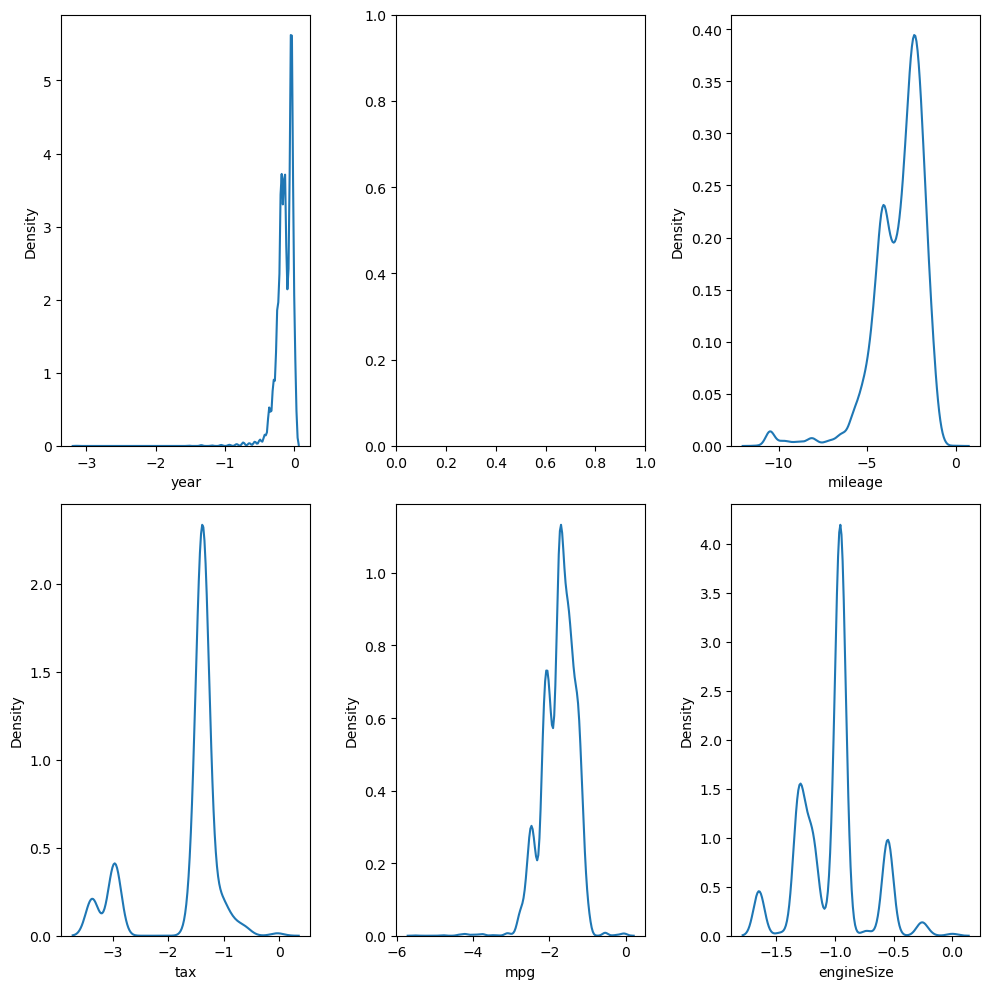

In [59]:
fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 10))
axis = axis.flatten()
for i, col in enumerate(num_cols):
    if col != 'price':
        sns.kdeplot(x = np.log(df_temp[col]), ax = axis[i])
plt.tight_layout()
plt.show()

In [61]:
X

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,Manual,15735,Petrol,150,55.40625,1.400391
1,A6,2016,Automatic,36203,Diesel,20,64.18750,2.000000
2,A1,2016,Manual,29946,Petrol,30,55.40625,1.400391
3,A4,2017,Automatic,25952,Diesel,145,67.31250,2.000000
4,A3,2019,Manual,1998,Petrol,145,49.59375,1.000000
...,...,...,...,...,...,...,...,...
10560,A3,2020,Manual,4018,Petrol,145,49.59375,1.000000
10561,A3,2020,Manual,1978,Petrol,150,49.59375,1.000000
10562,A3,2020,Manual,609,Petrol,150,49.59375,1.000000
10563,Q3,2017,Automatic,8646,Petrol,150,47.90625,1.400391


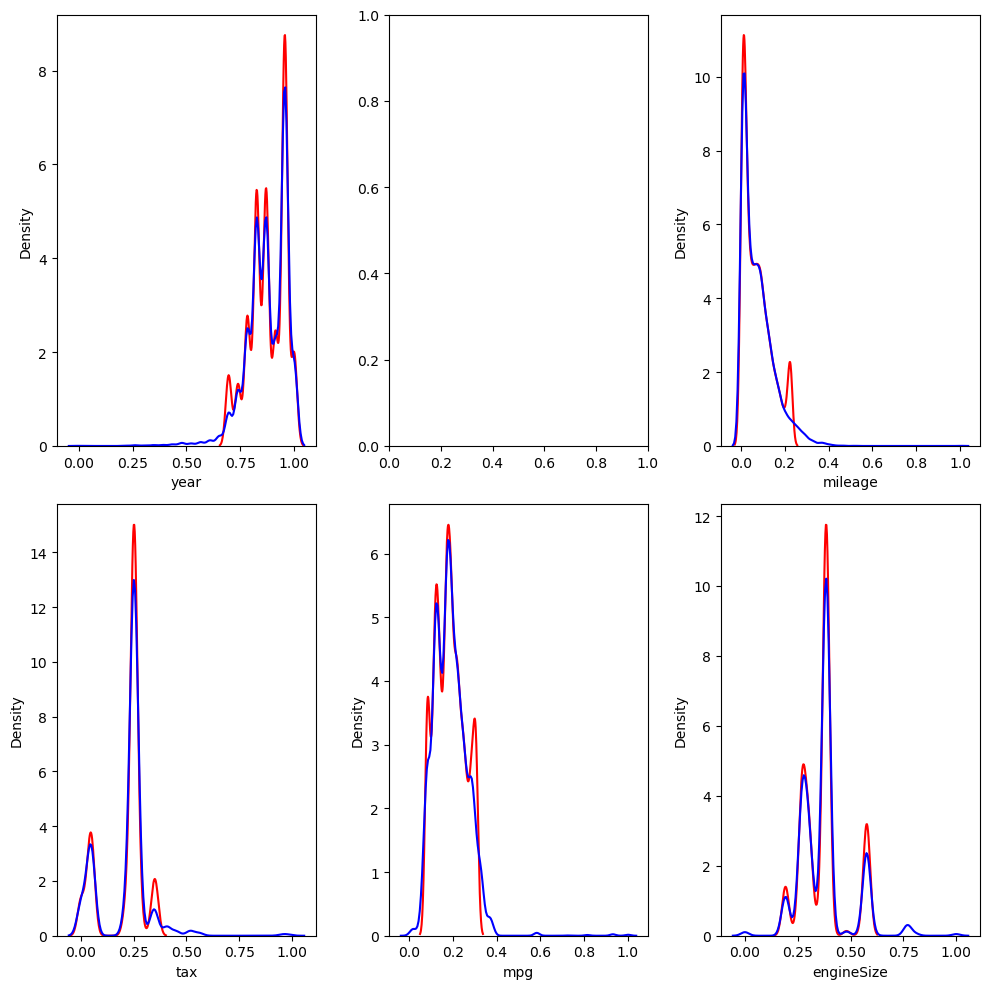

In [63]:
dfa = pd.DataFrame()
fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 10))
axis = axis.flatten()
for i, col in enumerate(num_cols):
    if col != 'price':
        dfa[col] = df_temp[col].copy()
        
        tenth_percentile = np.percentile(df_temp[col], 5)
        nineteeth_percentile = np.percentile(df_temp[col], 95)

        dfa[col] = np.where(dfa[col] < tenth_percentile, tenth_percentile, dfa[col])
        dfa[col] = np.where(dfa[col] > nineteeth_percentile, nineteeth_percentile, dfa[col])

        sns.kdeplot(x = dfa[col], ax = axis[i], color = 'red')
        sns.kdeplot(x = df_temp[col], ax = axis[i], color = 'blue')

plt.tight_layout()
plt.show()

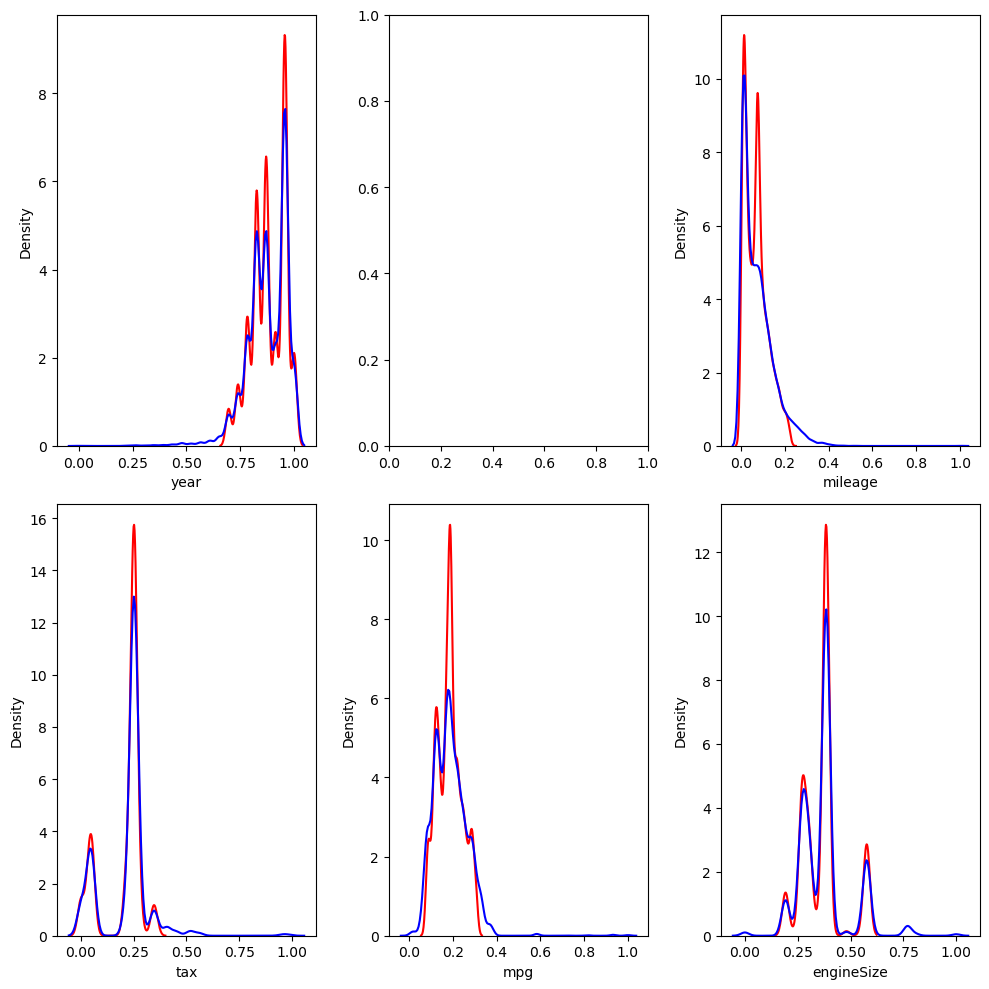

In [65]:
dfa = pd.DataFrame()
fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 10))
axis = axis.flatten()
for i, col in enumerate(num_cols):
    if col != 'price':
        dfa[col] = df_temp[col].copy()
        
        tenth_percentile = np.percentile(df_temp[col], 5)
        nineteeth_percentile = np.percentile(df_temp[col], 95)
        
        mean = dfa[col].mean()
        dfa[col] = np.where(dfa[col] < tenth_percentile, mean, dfa[col])
        dfa[col] = np.where(dfa[col] > nineteeth_percentile, mean, dfa[col])

        sns.kdeplot(x = dfa[col], ax = axis[i], color = 'red')
        sns.kdeplot(x = df_temp[col], ax = axis[i], color = 'blue')

plt.tight_layout()
plt.show()

In [67]:
df_temp.columns
num_cols

['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']

E:\Anaconda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
E:\Anaconda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
E:\Anaconda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
E:\Anaconda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
E:\Anaconda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
E:\Anaconda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


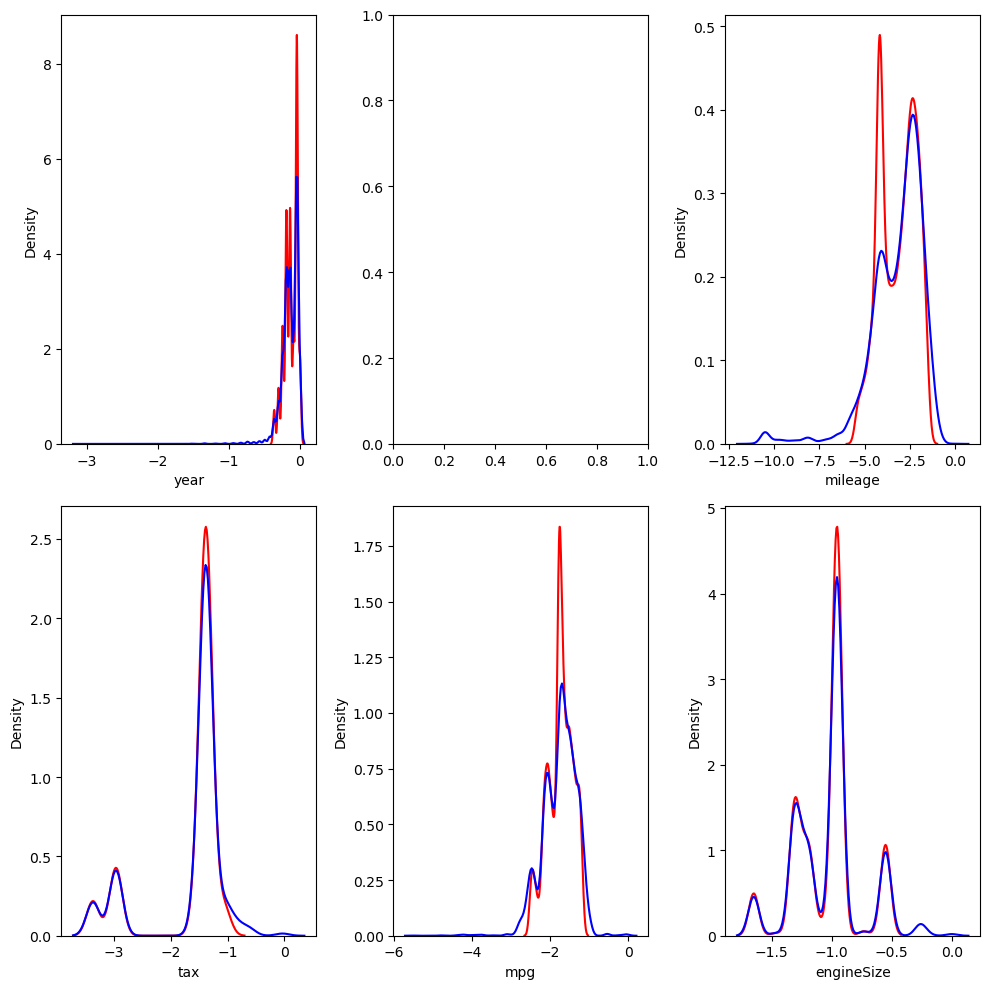

In [69]:
dfk = pd.DataFrame()
fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 10))
axis = axis.flatten()
for i, col in enumerate(num_cols):
    if col != 'price':
        dfk[col] = df_temp[col].copy()
        
        tenth_percentile = np.percentile(df_temp[col], 5)
        nineteeth_percentile = np.percentile(df_temp[col], 95)
        
        mode = dfk[col].mode()[0]
        dfk[col] = np.where(dfk[col] < tenth_percentile, mode, dfk[col])
        dfk[col] = np.where(dfk[col] > nineteeth_percentile, mode, dfk[col])

        sns.kdeplot(x = np.log(dfk[col]), ax = axis[i], color = 'red')
        sns.kdeplot(x = np.log(df_temp[col]), ax = axis[i], color = 'blue')

plt.tight_layout()
plt.show()

In [71]:
mode = dfk['mpg'].mode()


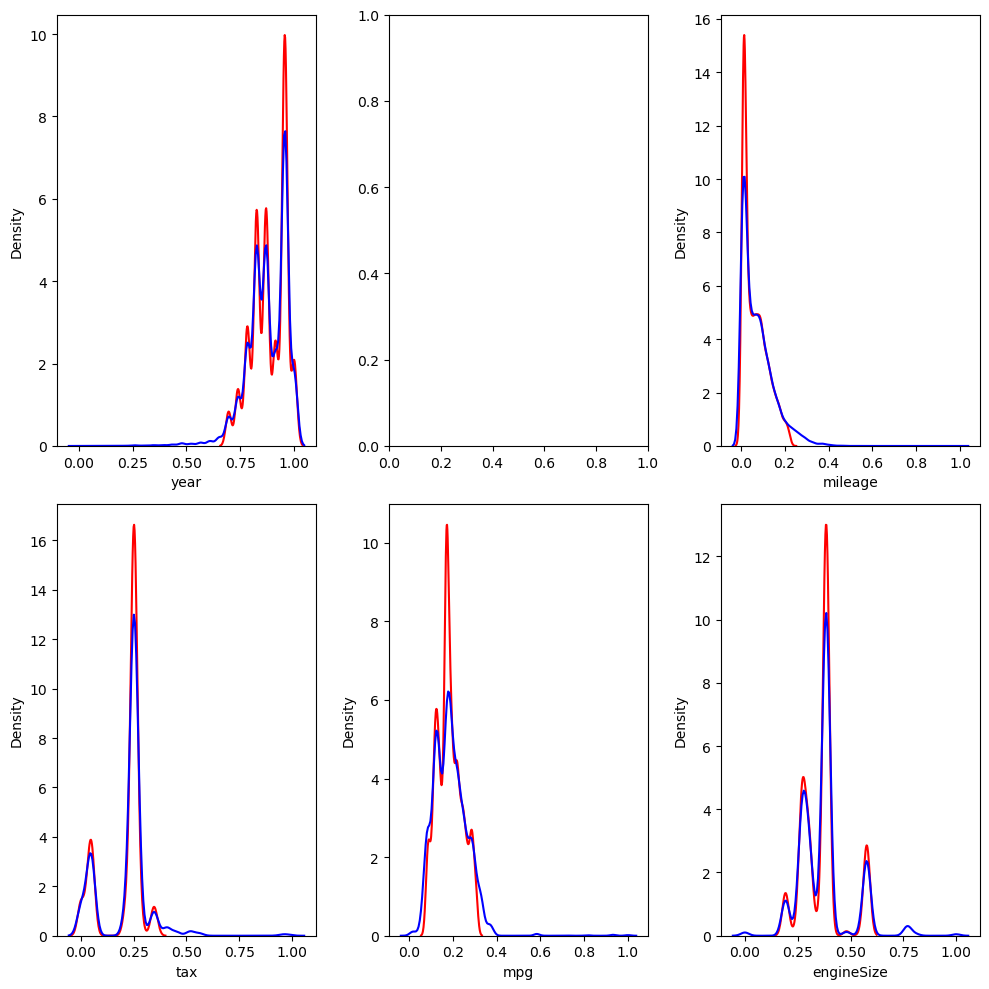

In [73]:
dfa = pd.DataFrame()
fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 10))
axis = axis.flatten()
for i, col in enumerate(num_cols):
    if col != 'price':
        dfa[col] = df_temp[col].copy()
        
        tenth_percentile = np.percentile(df_temp[col], 5)
        nineteeth_percentile = np.percentile(df_temp[col], 95)
        
        mode = dfa[col].mode()
        dfa[col] = np.where(dfa[col] < tenth_percentile, mode, dfa[col])
        dfa[col] = np.where(dfa[col] > nineteeth_percentile, mode, dfa[col])

        sns.kdeplot(x = (dfa[col]), ax = axis[i], color = 'red')
        sns.kdeplot(x = (df_temp[col]), ax = axis[i], color = 'blue')

plt.tight_layout()
plt.show()

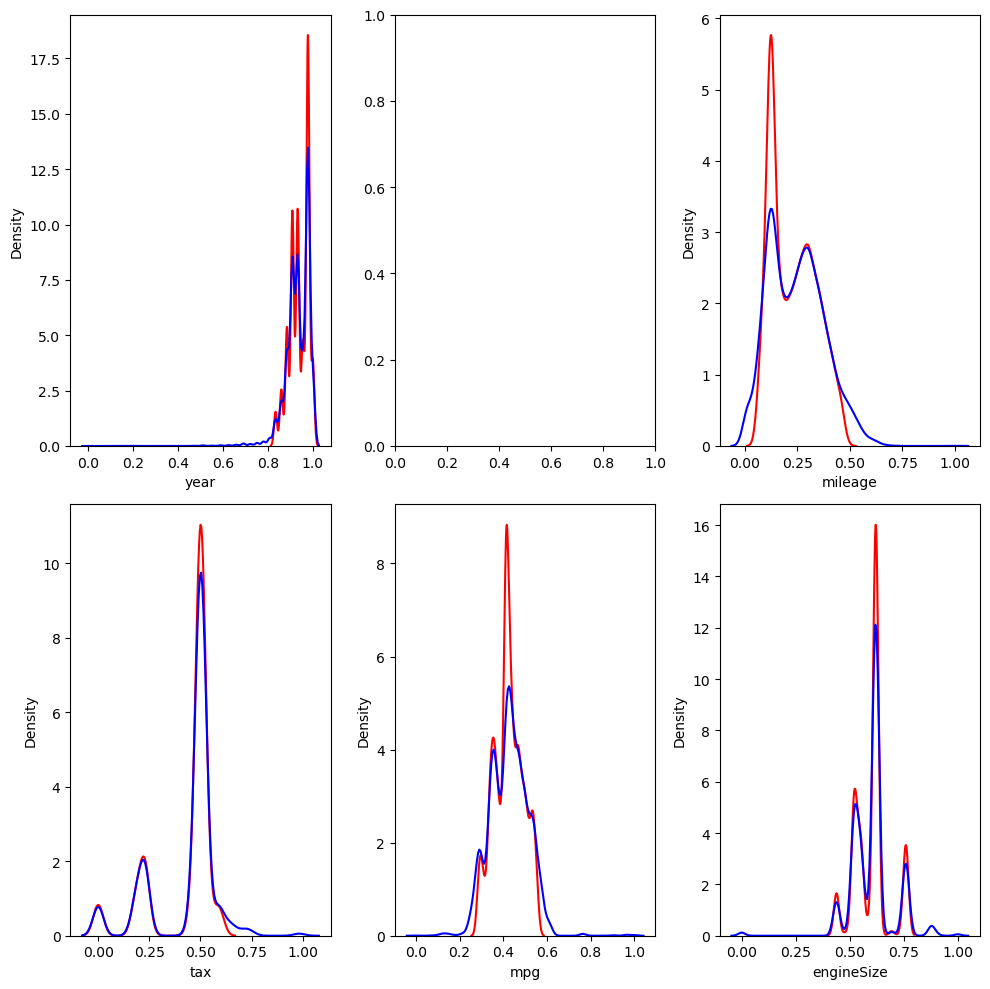

In [75]:
dfa = pd.DataFrame()
fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 10))
axis = axis.flatten()
for i, col in enumerate(num_cols):
    if col != 'price':
        dfa[col] = df_temp[col].copy()
        
        tenth_percentile = np.percentile(df_temp[col], 5)
        nineteeth_percentile = np.percentile(df_temp[col], 95)
        
        mode = dfa[col].mode()
        dfa[col] = np.where(dfa[col] < tenth_percentile, mode, dfa[col])
        dfa[col] = np.where(dfa[col] > nineteeth_percentile, mode, dfa[col])

        sns.kdeplot(x = np.sqrt(dfa[col]), ax = axis[i], color = 'red')
        sns.kdeplot(x = np.sqrt(df_temp[col]), ax = axis[i], color = 'blue')

plt.tight_layout()
plt.show()

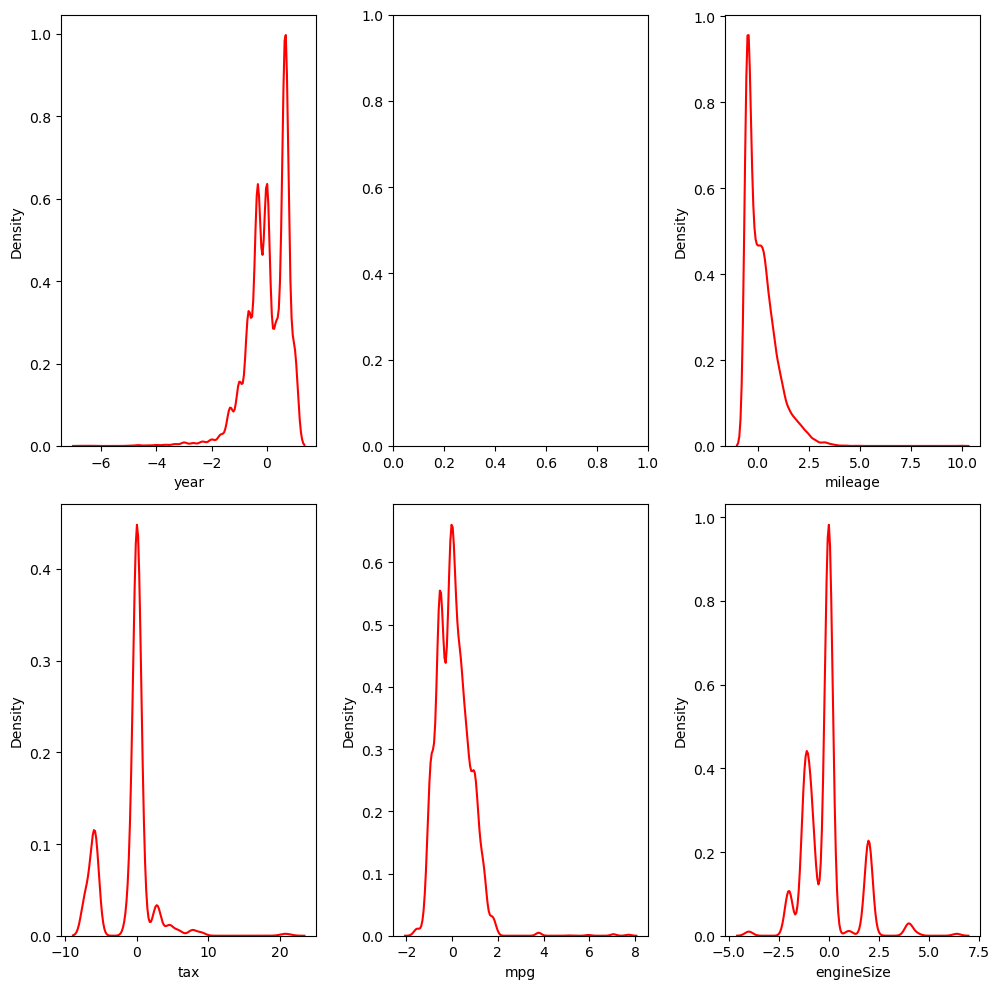

In [77]:
from sklearn.preprocessing import RobustScaler
rb1 = RobustScaler()
rb2 = RobustScaler()

dfa = pd.DataFrame()
fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 10))
axis = axis.flatten()
for i, col in enumerate(num_cols):
    if col != 'price':
        dfa[col] = df_temp[col].copy()
        rb1 = RobustScaler()
        dfa[col] = rb1.fit_transform(dfa[col].values.reshape(-1, 1))
        #tenth_percentile = np.percentile(df_temp[col], 5)
        #nineteeth_percentile = np.percentile(df_temp[col], 95)
        
        #mode = dfa[col].mode()
        #dfa[col] = np.where(dfa[col] < tenth_percentile, mode, dfa[col])
        #dfa[col] = np.where(dfa[col] > nineteeth_percentile, mode, dfa[col])

        sns.kdeplot(x = (dfa[col]), ax = axis[i], color = 'red')
        #sns.kdeplot(x = (df_temp[col]), ax = axis[i], color = 'blue')

plt.tight_layout()
plt.show()

In [79]:
X.reset_index(drop = True, inplace = True)
X

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,Manual,15735,Petrol,150,55.40625,1.400391
1,A6,2016,Automatic,36203,Diesel,20,64.18750,2.000000
2,A1,2016,Manual,29946,Petrol,30,55.40625,1.400391
3,A4,2017,Automatic,25952,Diesel,145,67.31250,2.000000
4,A3,2019,Manual,1998,Petrol,145,49.59375,1.000000
...,...,...,...,...,...,...,...,...
10560,A3,2020,Manual,4018,Petrol,145,49.59375,1.000000
10561,A3,2020,Manual,1978,Petrol,150,49.59375,1.000000
10562,A3,2020,Manual,609,Petrol,150,49.59375,1.000000
10563,Q3,2017,Automatic,8646,Petrol,150,47.90625,1.400391


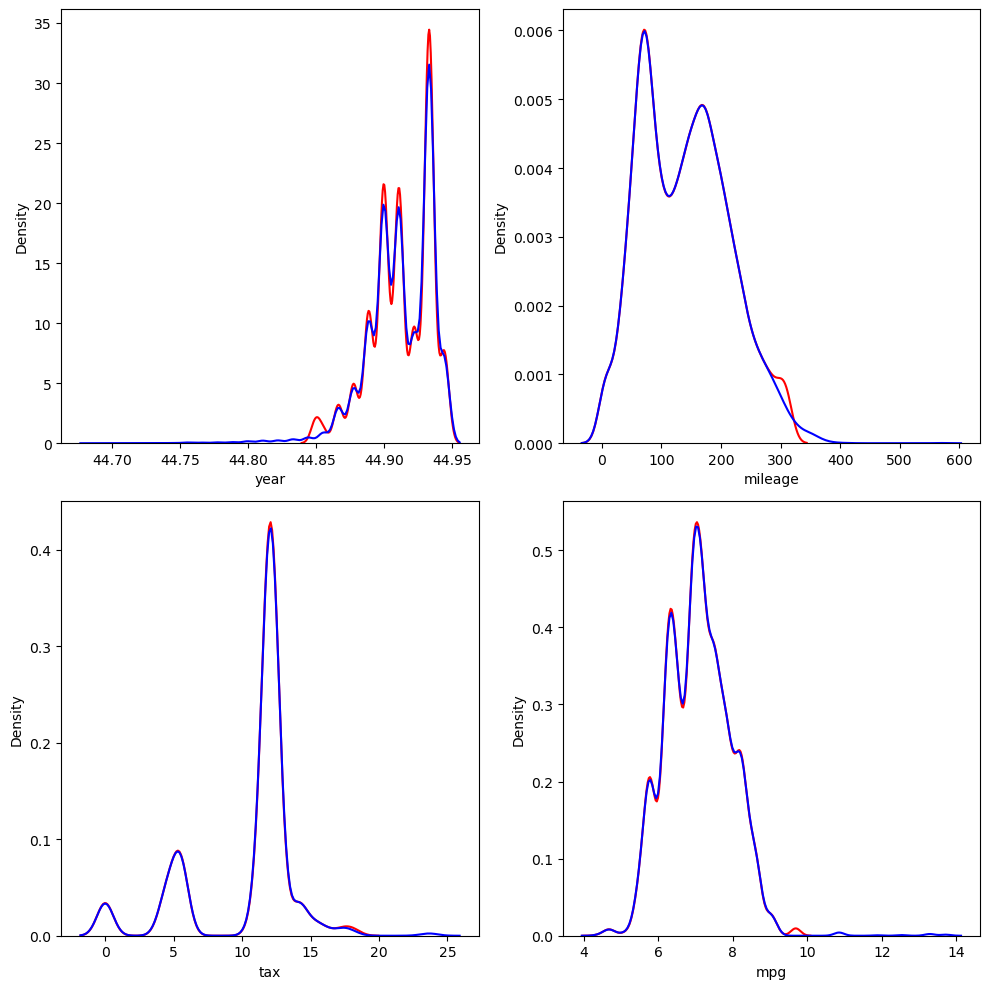

In [81]:
dfa = pd.DataFrame()
dft = X.drop(columns = ['transmission', 'engineSize', 'model', 'fuelType']).copy()
dfa = dft.copy()
fig, axis = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))
num_cols_final = X.drop(columns = ['transmission', 'engineSize', 'model', 'fuelType']).columns.to_list()
axis = axis.flatten()
for i, col in enumerate(num_cols_final):
        #dfa[col] = df_temp[col].copy()
        #rb = RobustScaler()
        #dfa[col] = rb1.fit_transform(dfa[col].values.reshape(-1, 1))
        q1 = np.percentile(dfa[col], 20)
        q3 = np.percentile(dfa[col], 80)

        iqr = q3 - q1
        lr = q1 - 1.5 * iqr
        ur = q3 + 1.5 * iqr
        
        #mode = dfa[col].mode()
        dfa[col] = np.where(dfa[col] < lr, lr, dfa[col])
        dfa[col] = np.where(dfa[col] > ur, ur, dfa[col])

        #rb = RobustScaler()
        #dfa[col] = rb1.fit_transform(dfa[col].values.reshape(-1, 1))
    
        sns.kdeplot(x = np.sqrt(dfa[col]), ax = axis[i], color = 'red')
        sns.kdeplot(x = np.sqrt(dft[col]), ax = axis[i], color = 'blue')

plt.tight_layout()
plt.show()

In [83]:
X.columns

Index(['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize'],
      dtype='object')

In [85]:
X.reset_index(drop = True, inplace = True)
X

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,Manual,15735,Petrol,150,55.40625,1.400391
1,A6,2016,Automatic,36203,Diesel,20,64.18750,2.000000
2,A1,2016,Manual,29946,Petrol,30,55.40625,1.400391
3,A4,2017,Automatic,25952,Diesel,145,67.31250,2.000000
4,A3,2019,Manual,1998,Petrol,145,49.59375,1.000000
...,...,...,...,...,...,...,...,...
10560,A3,2020,Manual,4018,Petrol,145,49.59375,1.000000
10561,A3,2020,Manual,1978,Petrol,150,49.59375,1.000000
10562,A3,2020,Manual,609,Petrol,150,49.59375,1.000000
10563,Q3,2017,Automatic,8646,Petrol,150,47.90625,1.400391


In [87]:
#dfa.reset_index(drop = True, inplace = True)

In [89]:
dfa

,year,mileage,tax,mpg
0,2017.0,15735.0,150.0,55.40625
1,2016.0,36203.0,20.0,64.18750
2,2016.0,29946.0,30.0,55.40625
3,2017.0,25952.0,145.0,67.31250
4,2019.0,1998.0,145.0,49.59375
...,...,...,...,...
10560,2020.0,4018.0,145.0,49.59375
10561,2020.0,1978.0,150.0,49.59375
10562,2020.0,609.0,150.0,49.59375
10563,2017.0,8646.0,150.0,47.90625


In [91]:
dff = pd.concat([dfa, X.drop(columns = dfa.columns.to_list())], axis = 1)
dff

,year,mileage,tax,mpg,model,transmission,fuelType,engineSize
0,2017.0,15735.0,150.0,55.40625,A1,Manual,Petrol,1.400391
1,2016.0,36203.0,20.0,64.18750,A6,Automatic,Diesel,2.000000
2,2016.0,29946.0,30.0,55.40625,A1,Manual,Petrol,1.400391
3,2017.0,25952.0,145.0,67.31250,A4,Automatic,Diesel,2.000000
4,2019.0,1998.0,145.0,49.59375,A3,Manual,Petrol,1.000000
...,...,...,...,...,...,...,...,...
10560,2020.0,4018.0,145.0,49.59375,A3,Manual,Petrol,1.000000
10561,2020.0,1978.0,150.0,49.59375,A3,Manual,Petrol,1.000000
10562,2020.0,609.0,150.0,49.59375,A3,Manual,Petrol,1.000000
10563,2017.0,8646.0,150.0,47.90625,Q3,Automatic,Petrol,1.400391


In [ ]:
mms2 = MinMaxScaler()
test = pd.DataFrame()
test['engineSize'] = mms2.fit_transform()

In [476]:
mms2 = MinMaxScaler()
test = pd.DataFrame()
#test['engineSize'] = mms2.fit_transform(df['engineSize'])
test = pd.DataFrame(data = X_test_cpyt, columns = X_test.select_dtypes(exclude = 'object').columns).reset_index(drop = True)
df_temp_for_engineSize = pd.concat([df_temp, test], axis= 0).reset_index(drop = True)
df_temp_for_engineSize.isnull().sum()

year          0
mileage       0
tax           0
mpg           0
engineSize    0
dtype: int64

In [478]:
test

,year,mileage,tax,mpg,engineSize
0,0.869565,0.066093,0.344828,0.123455,0.384673
1,0.826087,0.121647,0.051724,0.259273,0.384673
2,0.782609,0.142604,0.215517,0.186012,0.269346
3,0.826087,0.231700,0.353448,0.171249,0.577010
4,0.608696,0.233152,0.344828,0.123455,0.384673
...,...,...,...,...,...
2108,0.826087,0.049944,0.000000,0.285846,0.192337
2109,0.956522,0.015477,0.250000,0.129913,0.384673
2110,0.869565,0.060991,0.034483,0.276250,0.384673
2111,0.869565,0.089740,0.051724,0.228455,0.269346


In [480]:
df_temp

,year,mileage,tax,mpg,engineSize
0,0.956522,0.021003,0.250000,0.099834,0.577010
1,0.869565,0.079006,0.250000,0.186012,0.269346
2,0.956522,0.008146,0.250000,0.113859,0.384673
3,0.956522,0.007907,0.250000,0.148736,0.192337
4,0.739130,0.200611,0.344828,0.171249,0.384673
...,...,...,...,...,...
8447,0.869565,0.098378,0.051724,0.276250,0.384673
8448,0.782609,0.109966,0.448276,0.133419,0.577010
8449,0.956522,0.000028,0.250000,0.066064,0.480841
8450,0.913043,0.046660,0.250000,0.197269,0.269346


In [482]:
df_temp_for_engineSize

,year,mileage,tax,mpg,engineSize
0,0.956522,0.021003,0.250000,0.099834,0.577010
1,0.869565,0.079006,0.250000,0.186012,0.269346
2,0.956522,0.008146,0.250000,0.113859,0.384673
3,0.956522,0.007907,0.250000,0.148736,0.192337
4,0.739130,0.200611,0.344828,0.171249,0.384673
...,...,...,...,...,...
10560,0.826087,0.049944,0.000000,0.285846,0.192337
10561,0.956522,0.015477,0.250000,0.129913,0.384673
10562,0.869565,0.060991,0.034483,0.276250,0.384673
10563,0.869565,0.089740,0.051724,0.228455,0.269346


E:\Anaconda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='engineSize', ylabel='Density'>

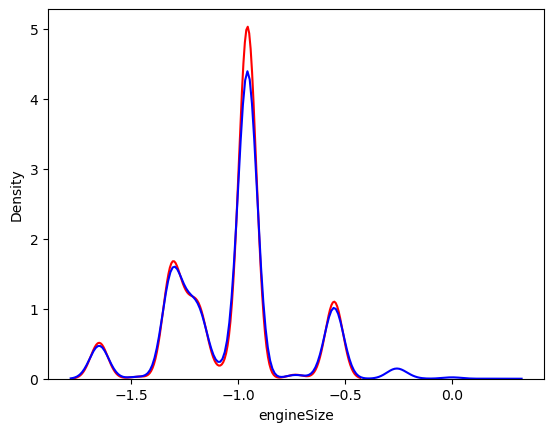

In [484]:
dfs = pd.DataFrame()
dfs = df_temp_for_engineSize.copy()
tenth_percentile = np.percentile(dfs['engineSize'], 5)
nineteeth_percentile = np.percentile(dfs['engineSize'], 95)
        
mode = dfs['engineSize'].mode()[0]
dfs['engineSize'] = np.where(dfs['engineSize'] < tenth_percentile, mode, dfs['engineSize'])
dfs['engineSize'] = np.where(dfs['engineSize'] > nineteeth_percentile, mode, dfs['engineSize'])

sns.kdeplot(x = np.log(dfs['engineSize']), color = 'red')
sns.kdeplot(x = np.log(df_temp_for_engineSize['engineSize']),  color = 'blue')

E:\Anaconda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='engineSize', ylabel='Density'>

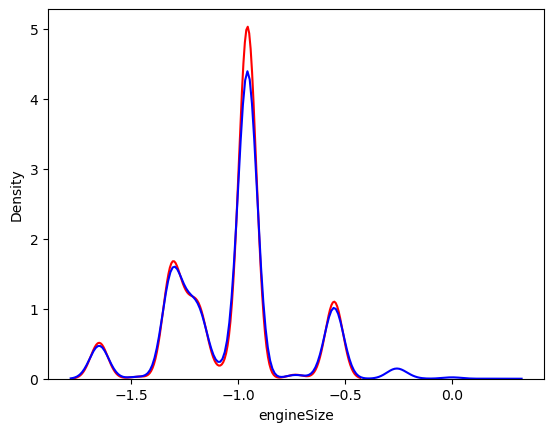

In [490]:
a = pd.DataFrame()
a['engineSize'] = df_temp_for_engineSize['engineSize'].copy()
fifith_percentile = np.percentile(a['engineSize'], 5)
ninetyfifth_percentile = np.percentile(a['engineSize'], 95)
        
mode = df_temp_for_engineSize['engineSize'].mode()[0]
a['engineSize'] = np.where(a['engineSize'] < fifith_percentile, mode, a['engineSize'])
a['engineSize'] = np.where(a['engineSize'] > ninetyfifth_percentile, mode, a['engineSize'])
sns.kdeplot(x = np.log(a['engineSize']), color = 'red')
sns.kdeplot(x = np.log(df_temp_for_engineSize['engineSize']),  color = 'blue')

In [488]:
df_temp_for_engineSize['engineSize']

0        0.577010
1        0.269346
2        0.384673
3        0.192337
4        0.384673
           ...   
10560    0.192337
10561    0.384673
10562    0.384673
10563    0.269346
10564    0.384673
Name: engineSize, Length: 10565, dtype: float64

In [93]:
a = pd.DataFrame()
a['engineSize'] = X['engineSize'].copy()
fifith_percentile = np.percentile(a['engineSize'], 5)
ninetyfifth_percentile = np.percentile(a['engineSize'], 95)
        
mode = X['engineSize'].mode()[0]
a['engineSize'] = np.where(a['engineSize'] < fifith_percentile, mode, a['engineSize'])
a['engineSize'] = np.where(a['engineSize'] > ninetyfifth_percentile, mode, a['engineSize'])
a['engineSize'] = np.log(a['engineSize'])

In [109]:
dff.describe()

E:\Anaconda\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,year,mileage,tax,mpg,engineSize
count,10565.000000,10565.000000,10565.000000,10565.00000,10565.000000
mean,2017.132324,24721.946900,125.041174,inf,1.931641
std,1.977067,22491.218147,63.161274,11.90625,0.602539
min,2011.500000,1.000000,0.000000,18.90625,0.000000
25%,2016.000000,6000.000000,125.000000,40.90625,1.500000
50%,2017.000000,19268.000000,145.000000,49.59375,2.000000
75%,2019.000000,36668.000000,145.000000,58.90625,2.000000
max,2020.000000,95963.000000,330.000000,93.81250,6.300781


In [113]:
dff_f = pd.concat([dff.drop('engineSize', axis = 'columns'), a['engineSize']], axis = 1)
dff_f

,year,mileage,tax,mpg,model,transmission,fuelType,engineSize
0,2017.0,15735.0,150.0,55.40625,A1,Manual,Petrol,0.336670
1,2016.0,36203.0,20.0,64.18750,A6,Automatic,Diesel,0.693359
2,2016.0,29946.0,30.0,55.40625,A1,Manual,Petrol,0.336670
3,2017.0,25952.0,145.0,67.31250,A4,Automatic,Diesel,0.693359
4,2019.0,1998.0,145.0,49.59375,A3,Manual,Petrol,0.000000
...,...,...,...,...,...,...,...,...
10560,2020.0,4018.0,145.0,49.59375,A3,Manual,Petrol,0.000000
10561,2020.0,1978.0,150.0,49.59375,A3,Manual,Petrol,0.000000
10562,2020.0,609.0,150.0,49.59375,A3,Manual,Petrol,0.000000
10563,2017.0,8646.0,150.0,47.90625,Q3,Automatic,Petrol,0.336670


In [115]:
dff_f.describe()

E:\Anaconda\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,year,mileage,tax,mpg,engineSize
count,10565.000000,10565.000000,10565.000000,10565.00000,10565.000000
mean,2017.132324,24721.946900,125.041174,inf,0.608398
std,1.977067,22491.218147,63.161274,11.90625,0.258057
min,2011.500000,1.000000,0.000000,18.90625,0.000000
25%,2016.000000,6000.000000,125.000000,40.90625,0.405518
50%,2017.000000,19268.000000,145.000000,49.59375,0.693359
75%,2019.000000,36668.000000,145.000000,58.90625,0.693359
max,2020.000000,95963.000000,330.000000,93.81250,1.098633


In [97]:
dff_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10565 entries, 0 to 10564
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          10565 non-null  float64
 1   mileage       10565 non-null  float64
 2   tax           10565 non-null  float64
 3   mpg           10565 non-null  float16
 4   model         10565 non-null  object 
 5   transmission  10565 non-null  object 
 6   fuelType      10565 non-null  object 
 7   engineSize    10565 non-null  float16
dtypes: float16(2), float64(3), object(3)
memory usage: 536.6+ KB


In [117]:
dff_f['year'] = dff_f['year'].astype('int16')
dff_f['mileage'] = dff_f['mileage'].astype('int32')
dff_f['tax'] = dff_f['tax'].astype('int16')
dff_f['mpg'] = dff_f['mpg'].astype('float16')
dff_f['mpg'] = dff_f['mpg'].astype('float16')

In [119]:
dff_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10565 entries, 0 to 10564
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          10565 non-null  int16  
 1   mileage       10565 non-null  int32  
 2   tax           10565 non-null  int16  
 3   mpg           10565 non-null  float16
 4   model         10565 non-null  object 
 5   transmission  10565 non-null  object 
 6   fuelType      10565 non-null  object 
 7   engineSize    10565 non-null  float16
dtypes: float16(2), int16(2), int32(1), object(3)
memory usage: 371.6+ KB


In [121]:
dff_f.describe()

E:\Anaconda\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,year,mileage,tax,mpg,engineSize
count,10565.000000,10565.000000,10565.000000,10565.00000,10565.000000
mean,2017.124278,24721.946900,125.041174,inf,0.608398
std,2.000848,22491.218147,63.161274,11.90625,0.258057
min,2011.000000,1.000000,0.000000,18.90625,0.000000
25%,2016.000000,6000.000000,125.000000,40.90625,0.405518
50%,2017.000000,19268.000000,145.000000,49.59375,0.693359
75%,2019.000000,36668.000000,145.000000,58.90625,0.693359
max,2020.000000,95963.000000,330.000000,93.81250,1.098633


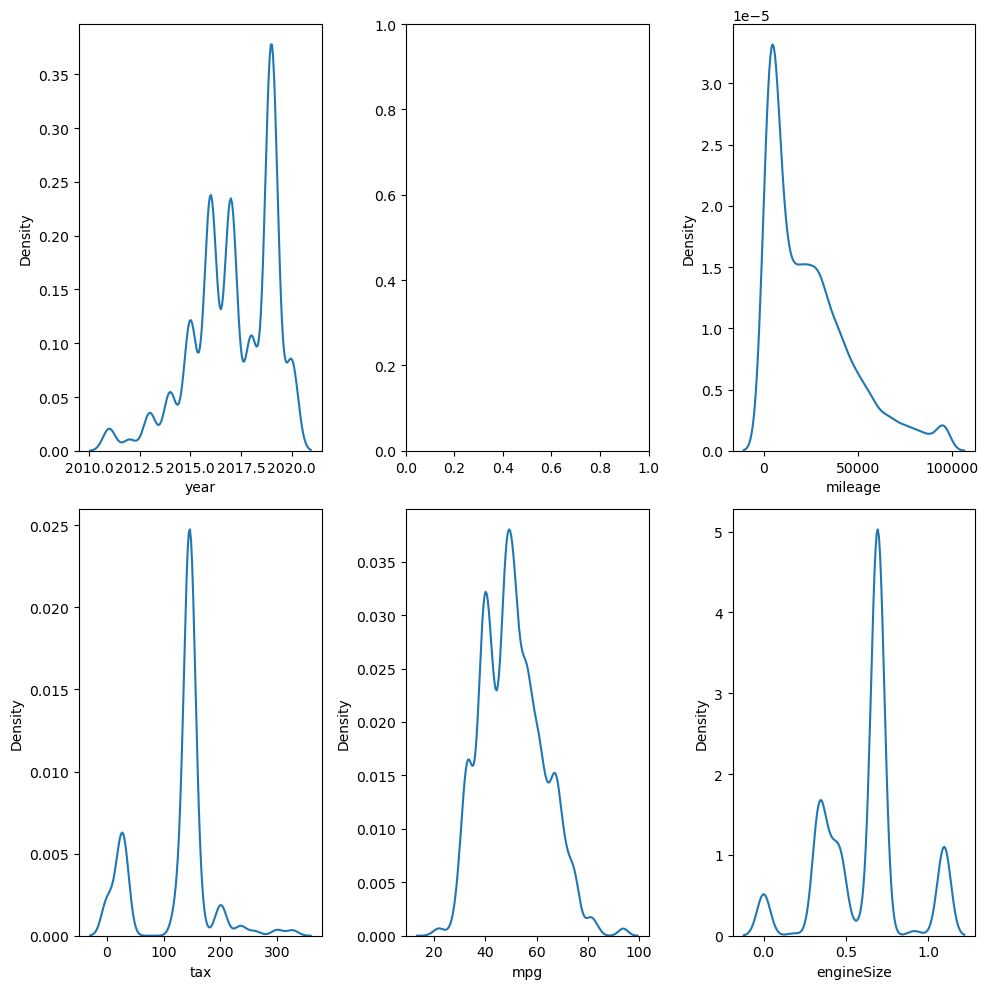

In [123]:
fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 10))
axis = axis.flatten()
for i, col in enumerate(num_cols):
    if col != 'price':
        sns.kdeplot(x = dff_f[col], ax = axis[i])
plt.tight_layout()
plt.show()

In [518]:
# One Hot Encoding
# From here try to construct a pipeline 

In [125]:
cat_cols = dff_f.select_dtypes(include = 'object').columns.to_list()

In [127]:
cat_cols

['model', 'transmission', 'fuelType']

In [189]:
for i in cat_cols:
    print(dff_f[i].str.strip().value_counts())
    print()

model
A3        1917
Q3        1379
A4        1375
A1        1337
A5         874
Q5         864
Q2         810
A6         748
Q7         394
TT         336
A7         122
A8         118
Q8          69
RS6         39
RS3         33
RS4         31
RS5         28
R8          28
S3          18
SQ5         16
S4          12
SQ7          8
S8           4
S5           3
Others       2
Name: count, dtype: int64

transmission
Manual       4317
Semi-Auto    3568
Automatic    2680
Name: count, dtype: int64

fuelType
Diesel    5537
Petrol    5000
Hybrid      28
Name: count, dtype: int64



In [191]:
dff_f['model'] = dff_f['model'].str.strip()

In [217]:
df_cpy = dff_f.copy()
X = df_cpy.copy()
y = df['price'].copy()

In [245]:
X_trainf, X_testf, y_trainf, y_testf = train_test_split(X, y, stratify = X['model'], random_state = 22, test_size = 0.2)

In [247]:
X_trainf.isnull().sum()

year            0
mileage         0
tax             0
mpg             0
model           0
transmission    0
fuelType        0
engineSize      0
dtype: int64

In [221]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

In [301]:
oe = OrdinalEncoder(categories = [['Petrol', 'Diesel', 'Hybrid'], ['Manual', 'Semi-Auto', 'Automatic']])
X_trainf[['fuelType', 'transmission']] = oe.fit_transform(X_trainf[['fuelType', 'transmission']])

In [303]:
X_testf[['fuelType', 'transmission']] = oe.transform(X_testf[['fuelType', 'transmission']])

In [281]:
ohe = OneHotEncoder(sparse_output = False, drop = 'first')

dtemp1 = pd.DataFrame()
dtemp1['model'] = X_trainf['model'].copy()

xtrmodel = ohe.fit_transform(X_trainf[['model']])

dtemp2 = pd.DataFrame()
dtemp2['model'] = X_testf['model'].copy()

xttmodel = ohe.transform(X_testf[['model']])

ohe_col_names_model = ohe.get_feature_names_out(['model'])

xtrmodel = pd.DataFrame(data = xtrmodel, columns = ohe_col_names_model)
xttmodel = pd.DataFrame(data = xttmodel, columns = ohe_col_names_model)
xtrmodel.index = X_trainf.index
xttmodel.index = X_testf.index
print(xtrmodel.head())
print()
print()
print(xttmodel.head())

      model_A3  model_A4  model_A5  model_A6  model_A7  model_A8  \
9868       0.0       0.0       0.0       0.0       0.0       0.0   
4768       0.0       0.0       0.0       0.0       0.0       0.0   
5814       0.0       1.0       0.0       0.0       0.0       0.0   
6924       0.0       0.0       1.0       0.0       0.0       0.0   
9746       1.0       0.0       0.0       0.0       0.0       0.0   

      model_Others  model_Q2  model_Q3  model_Q5  ...  model_RS4  model_RS5  \
9868           0.0       0.0       1.0       0.0  ...        0.0        0.0   
4768           0.0       0.0       0.0       0.0  ...        0.0        0.0   
5814           0.0       0.0       0.0       0.0  ...        0.0        0.0   
6924           0.0       0.0       0.0       0.0  ...        0.0        0.0   
9746           0.0       0.0       0.0       0.0  ...        0.0        0.0   

      model_RS6  model_S3  model_S4  model_S5  model_S8  model_SQ5  model_SQ7  \
9868        0.0       0.0       0.0

In [283]:
xtrmodel.isnull().sum()

model_A3        0
model_A4        0
model_A5        0
model_A6        0
model_A7        0
model_A8        0
model_Others    0
model_Q2        0
model_Q3        0
model_Q5        0
model_Q7        0
model_Q8        0
model_R8        0
model_RS3       0
model_RS4       0
model_RS5       0
model_RS6       0
model_S3        0
model_S4        0
model_S5        0
model_S8        0
model_SQ5       0
model_SQ7       0
model_TT        0
dtype: int64

In [285]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Sample DataFrame
data = {
    'color': ['red', 'blue', 'green', 'blue', 'red'],
    'size': ['S', 'M', 'L', 'S', 'L'],
    'num' : [0.5, 1, 1.5, 2.0, 2.5]
}
df = pd.DataFrame(data)

# Columns to encode
cols_to_encode = ['color', 'size']

# Instantiate the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the columns
encoded_array = encoder.fit_transform(df[cols_to_encode])

# Get the column names from the encoder
encoded_col_names = encoder.get_feature_names_out(cols_to_encode)
print(encoded_col_names)

# Convert the array to a DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoded_col_names)

print(encoded_df)


['color_blue' 'color_green' 'color_red' 'size_L' 'size_M' 'size_S']
   color_blue  color_green  color_red  size_L  size_M  size_S
0         0.0          0.0        1.0     0.0     0.0     1.0
1         1.0          0.0        0.0     0.0     1.0     0.0
2         0.0          1.0        0.0     1.0     0.0     0.0
3         1.0          0.0        0.0     0.0     0.0     1.0
4         0.0          0.0        1.0     1.0     0.0     0.0


In [287]:
X_trainf.isnull().sum()

year            0
mileage         0
tax             0
mpg             0
model           0
transmission    0
fuelType        0
engineSize      0
dtype: int64

In [305]:
X_trainfa = pd.concat([X_trainf.drop(columns = ['model']), xtrmodel], axis = 1)
X_testfa = pd.concat([X_testf.drop(columns = ['model']), xttmodel], axis = 1)

In [307]:
X_trainfa['transmission'].value_counts()

transmission
0.0    3444
1.0    2842
2.0    2166
Name: count, dtype: int64

In [311]:
X_trainfa.head()

,year,mileage,tax,mpg,transmission,fuelType,engineSize,model_A3,model_A4,model_A5,...,model_RS4,model_RS5,model_RS6,model_S3,model_S4,model_S5,model_S8,model_SQ5,model_SQ7,model_TT
9868,2016,19821,165,49.59375,0.0,1.0,0.693359,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4768,2017,30658,30,56.50000,2.0,0.0,0.336670,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5814,2015,43288,145,53.31250,2.0,1.0,0.693359,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6924,2020,1500,145,51.40625,1.0,1.0,0.693359,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9746,2016,17363,20,60.09375,0.0,0.0,0.336670,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [309]:
lr = LinearRegression()
lr.fit(X_trainfa, y_train)
r2_score(y_test, lr.predict(X_testfa))

-0.010865085757887138

In [317]:
rfr = RandomForestRegressor(n_jobs = -1)
rfr.fit(X_trainfa, y_train)
r2_score(y_test, rfr.predict(X_testfa))

-0.2092663765909939

In [327]:
import optuna
from xgboost import XGBRegressor
def objective(trial):
    
    # Define hyperparameters to tune
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5)
    }
    
    # Initialize and train the model
    model = XGBRegressor(**params)
    model.fit(X_trainfa, y_train)
    
    # Make predictions
    y_pred = model.predict(X_testfa)
    
    # Calculate the mean squared error
    r2 = r2_score(y_test, y_pred)
    
    return r2


In [331]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
print("Best hyperparameters: ", study.best_params)

[I 2024-08-03 16:25:03,037] A new study created in memory with name: no-name-3dc97e3f-0174-4863-b27d-9e6e6a542958
C:\Users\Zohaib Ali Singay\AppData\Local\Temp\ipykernel_12776\3306426802.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
[I 2024-08-03 16:25:04,133] Trial 0 finished with value: -0.20344865555249925 and parameters: {'n_estimators': 455, 'max_depth': 9, 'learning_rate': 0.0569175461800954, 'subsample': 0.9708256007781861, 'colsample_bytree': 0.7175995506443924, 'gamma': 3.257920849673507, 'reg_alpha': 2.261050425062252, 'reg_lambda': 2.5742174409539813}. Best is trial 0 with value: -0.20344865555249925.
C:\Users\Zohaib Ali Singay\AppData\Local\Temp\ipykernel_12776\3306426802.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0

Best hyperparameters:  {'n_estimators': 129, 'max_depth': 1, 'learning_rate': 0.01996577922165453, 'subsample': 0.5731143707458227, 'colsample_bytree': 0.7493439424909271, 'gamma': 1.8652879923692653, 'reg_alpha': 3.335375759919, 'reg_lambda': 2.1626968207264965}


In [337]:
best_params_xgb = study.best_params
model = XGBRegressor(**best_params_xgb)
model.fit(X_trainfa, y_train)
r2_score(y_test, model.predict(X_testfa))

-0.0018071928676617333

In [339]:
gbr = GradientBoostingRegressor(n_estimators = 200)
gbr.fit(X_trainfa, y_train)
r2_score(y_test, gbr.predict(X_testfa))

-0.038577013543732

In [353]:
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
for i in range(1, 30):
    pca = PCA(n_components = i)
    X_new_train = pca.fit_transform(X_trainfa)
    X_new_test = pca.transform(X_testfa)
    model = XGBRegressor(**best_params_xgb)
    model.fit(X_new_train, y_train)
    print(i, mean_squared_error(y_test, model.predict(X_new_test)))

1 138379952.8293236
2 139802687.2515492
3 141422888.21969315
4 141904545.27649862
5 141423146.9548971
6 140491350.53217033
7 140299907.07703272
8 140121337.44208708
9 140223125.18316966
10 139777381.36747643
11 139748463.65267986
12 139956375.91281825
13 140290110.9955167
14 140148552.05736825
15 140159793.87165183
16 141002691.65009096
17 140518658.12049425
18 140630882.38922417
19 140567425.03319672
20 140148552.4114465
21 140288574.83413178
22 139678152.1070766
23 140649306.42035303
24 140153929.6027382
25 140072238.80510482
26 139948969.42010686
27 139866116.47980434
28 139849273.2834205
29 140123179.7592869


In [357]:
hgbr = HistGradientBoostingRegressor(max_iter = 200)
hgbr.fit(X_trainfa, y_train)
r2_score(y_test, hgbr.predict(X_testfa))

-0.07919608201250639

In [359]:
from sklearn.linear_model import Ridge, Lasso
r = Ridge()
r.fit(X_trainfa, y_train)
r2_score(y_test, r.predict(X_testfa))

-0.010987264664939822

In [363]:
st = StandardScaler()
X_trainfa[X_trainfa.columns.to_list()] = st.fit_transform(X_trainfa)
X_testfa[X_testfa.columns.to_list()] = st.transform(X_testfa)

In [365]:
r = Ridge()
r.fit(X_trainfa, y_train)
r2_score(y_test, r.predict(X_testfa))

-1356335.4444590746

In [367]:
lr = LinearRegression()
lr.fit(X_trainfa, y_train)
r2_score(y_test, lr.predict(X_testfa))

-1358147.8442982202

In [369]:
X_trainfa

,year,mileage,tax,mpg,transmission,fuelType,engineSize,model_A3,model_A4,model_A5,...,model_RS4,model_RS5,model_RS6,model_S3,model_S4,model_S5,model_S8,model_SQ5,model_SQ7,model_TT
9868,-0.561802,-0.219163,0.628786,-0.086278,-1.060259,0.938792,0.324307,-0.470893,-0.386806,-0.300264,...,-0.054467,-0.051085,-0.060673,-0.040733,-0.034417,-0.015385,-0.018843,-0.039249,-0.02879,-0.181309
4768,-0.062606,0.261496,-1.505074,0.492391,1.438015,-1.044380,-1.052688,-0.470893,-0.386806,-0.300264,...,-0.054467,-0.051085,-0.060673,-0.040733,-0.034417,-0.015385,-0.018843,-0.039249,-0.02879,-0.181309
5814,-1.060997,0.821680,0.312658,0.225313,1.438015,0.938792,0.324307,-0.470893,2.585273,-0.300264,...,-0.054467,-0.051085,-0.060673,-0.040733,-0.034417,-0.015385,-0.018843,-0.039249,-0.02879,-0.181309
6924,1.434980,-1.031763,0.312658,0.065590,0.188878,0.938792,0.324307,-0.470893,-0.386806,3.330399,...,-0.054467,-0.051085,-0.060673,-0.040733,-0.034417,-0.015385,-0.018843,-0.039249,-0.02879,-0.181309
9746,-0.561802,-0.328184,-1.663138,0.793509,-1.060259,-1.044380,-1.052688,2.123624,-0.386806,-0.300264,...,-0.054467,-0.051085,-0.060673,-0.040733,-0.034417,-0.015385,-0.018843,-0.039249,-0.02879,-0.181309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395,0.935785,-0.832616,0.312658,-1.042000,0.188878,0.938792,0.324307,-0.470893,-0.386806,-0.300264,...,-0.054467,-0.051085,-0.060673,-0.040733,-0.034417,-0.015385,-0.018843,-0.039249,-0.02879,-0.181309
1148,1.434980,-0.901674,0.391690,-1.282894,0.188878,-1.044380,0.324307,-0.470893,-0.386806,-0.300264,...,-0.054467,-0.051085,-0.060673,-0.040733,-0.034417,-0.015385,-0.018843,-0.039249,-0.02879,5.515440
1360,0.436589,-0.429797,0.312658,0.141524,-1.060259,-1.044380,-1.052688,-0.470893,2.585273,-0.300264,...,-0.054467,-0.051085,-0.060673,-0.040733,-0.034417,-0.015385,-0.018843,-0.039249,-0.02879,-0.181309
3422,0.436589,-0.523649,0.312658,0.225313,-1.060259,-1.044380,-1.052688,-0.470893,2.585273,-0.300264,...,-0.054467,-0.051085,-0.060673,-0.040733,-0.034417,-0.015385,-0.018843,-0.039249,-0.02879,-0.181309


In [373]:
sns.pairplot(dff_f, y_vars = y)

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x000001F38C1E2DE0> (for post_execute), with arguments args (),kwargs {}:


ValueError: Image size of 1250x2641250 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 1250x2641250 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1250x2.64125e+06 with 7273 Axes>

In [379]:
abr = AdaBoostRegressor(n_estimators = 100, learning_rate = 0.1, estimator = XGBRegressor(**best_params_xgb))
abr.fit(X_trainfa, y_train)
r2_score(y_test, abr.predict(X_testfa))

-0.08361823954785153

In [387]:
ct = CatBoostRegressor(iterations = 2000)
ct.fit(X_trainfa, y_train)
r2_score(y_test, ct.predict(X_testfa))

Learning rate set to 0.032651
0:	learn: 11693.9453748	total: 3.84ms	remaining: 7.68s
1:	learn: 11692.3730921	total: 7.45ms	remaining: 7.44s
2:	learn: 11690.5116714	total: 10.6ms	remaining: 7.03s
3:	learn: 11687.7260518	total: 14ms	remaining: 6.97s
4:	learn: 11685.6877024	total: 17.3ms	remaining: 6.89s
5:	learn: 11684.5287526	total: 21.2ms	remaining: 7.04s
6:	learn: 11683.0259576	total: 25.6ms	remaining: 7.28s
7:	learn: 11681.0482207	total: 31.3ms	remaining: 7.8s
8:	learn: 11679.0608856	total: 35.5ms	remaining: 7.85s
9:	learn: 11676.0798743	total: 39ms	remaining: 7.76s
10:	learn: 11673.5237705	total: 44.3ms	remaining: 8.02s
11:	learn: 11671.1848210	total: 48.7ms	remaining: 8.06s
12:	learn: 11669.3372279	total: 52.4ms	remaining: 8.01s
13:	learn: 11666.2263657	total: 56.8ms	remaining: 8.06s
14:	learn: 11664.8552528	total: 62.5ms	remaining: 8.27s
15:	learn: 11662.2945200	total: 68.3ms	remaining: 8.47s
16:	learn: 11660.3988551	total: 74ms	remaining: 8.63s
17:	learn: 11657.6551721	total: 78.

-0.3262681192143595

In [389]:
from lightgbm import LGBMRegressor

In [391]:
lgbm = LGBMRegressor()
lgbm.fit(X_trainfa, y_train)
r2_score(y_test, lgbm.predict(X_testfa))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 439
[LightGBM] [Info] Number of data points in the train set: 8452, number of used features: 24
[LightGBM] [Info] Start training from score 22855.740771


-0.15917895187934739

In [393]:
svr = SVR()
svr.fit(X_trainfa, y_train)
r2_score(y_test, svr.predict(X_testfa))

-0.05752938335216351

In [399]:
estimators = [
    ('abr', AdaBoostRegressor()),
    ('gbr', GradientBoostingRegressor()),
    ('cat', CatBoostRegressor()),
    ('xgb', XGBRegressor(**best_params_xgb)),
    ('lgbm', LGBMRegressor()),
    ('etr', ExtraTreesRegressor())
]

sc = StackingRegressor(estimators = estimators, n_jobs = -1, final_estimator = RandomForestRegressor())
sc.fit(X_trainfa, y_train)
r2_score(y_test, sc.predict(X_testfa))

-0.22971805094065423

In [403]:
from sklearn.manifold import TSNE
for i in range(2, 30):
    for perplex in range(20, 51):
        tsne = TSNE(n_components = i, perplexity = perplex)
        X_tr_embedded = tsne.fit_transform(X_trainfa)
        X_ts_embedded = tsne.fit_transform(X_testfa)
        model = XGBRegressor(**best_params_xgb)
        model.fit(X_tr_embedded, y_train)
        print(i," ", perplex, " ", r2_score(y_test, model.predict(X_ts_embedded)))

2   20   0.0030551190501212355
2   21   0.0011195365526073253
2   22   0.0013198393800242236
2   23   -0.0005426997404194278
2   24   -0.0008732943699256701
2   25   -0.002573463860918057
2   26   -0.0011571926033620006
2   27   -0.0011601738928004313
2   28   -0.0003939881213830265
2   29   0.00021088337753139008
2   30   0.0021605498846882787
2   31   -0.002239425503285819
2   32   -4.908985272789046e-05
2   33   0.00021809577383402612
2   34   0.0005621343601953654
2   35   -0.001148758546311246
2   36   -0.0006438394473371467
2   37   -0.00036998641861707426
2   38   0.0010624301002863934
2   39   -0.0013717857072454986
2   40   0.0013828539073708068
2   41   0.002360318161532593
2   42   0.0018821671474700263
2   43   0.0017550793695642053
2   44   -0.0006944901718839436
2   45   0.0009956915895373841
2   46   -0.0009453381538913064
2   47   -0.0008747123480872254
2   48   -0.0011058486515014287
2   49   0.00013305065021618212
2   50   0.0007198228617637525
3   20   -0.00539966931

ValueError: 'n_components' should be inferior to 4 for the barnes_hut algorithm as it relies on quad-tree or oct-tree.